In [1]:
import omicverse as ov
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
ov.utils.ov_plot_set()

/Users/julia/miniforge3/envs/nocd/lib/python3.8/site-packages/phate/__init__.py


In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.1 pandas==1.5.3 scikit-learn==0.24.0 statsmodels==0.13.2 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.7


In [11]:
adata = sc.read_10x_mtx(
    'Pyomic/CRCdata/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)  

... reading from cache file cache/Users-julia-USTB-Pyomic-CRCdata-matrix.h5ad


In [12]:
adata

AnnData object with n_obs × n_vars = 140281 × 33694
    var: 'gene_ids'

In [13]:
adata.var_names_make_unique()

In [6]:
adata=ov.single.scanpy_lazy(adata)
adata

filtered out 1 cells that have less than 200 genes expressed
Running Scrublet
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.81
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.3%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.3%
    Scrublet finished (0:04:46)
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:16)
running Leiden clustering
    finished: found 28 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:32)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:03)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:52)


AnnData object with n_obs × n_vars = 132726 × 1458
    obs: 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'paga', 'leiden_sizes', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [4]:
scsa=ov.single.pySCSA(adata=adata,
                          foldchange=1.5,
                          pvalue=0.01,
                          celltype='cancer',
                          target='cellmarker',
                          tissue='All',
)

......Loading dataset from temp/pySCSA_2023.db


In [5]:
scsa.cell_anno(clustertype='leiden',
               cluster='all')

...Auto annotate cell
Version V2.0 [2023/04/07]
DB load: GO_items:47347,Human_GO:3,Mouse_GO:3,
CellMarkers:96074,CancerSEA:1574,
Ensembl_HGNC:61541,Ensembl_Mouse:55414
Namespace(Gensymbol=True, MarkerDB=None, celltype='cancer', cluster='all', db='temp/pySCSA_2023.db', fc='/Users/julia/Library/Jupyter/runtime/kernel-a3c7a1b2-05ce-42af-8409-32434bc4e30b.json', foldchange=1.5, input='temp/rna.csv', list_tissue=False, noprint=True, norefdb=False, outfmt='txt', output='temp/rna_anno.txt', pvalue=0.01, source='scanpy', species='Human', target='cellmarker', tissue='All', weight=100.0)
Version V2.0 [2023/04/07]
DB load: GO_items:47347,Human_GO:3,Mouse_GO:3,
CellMarkers:96074,CancerSEA:1574,
Ensembl_HGNC:61541,Ensembl_Mouse:55414
load markers: 15107
Cluster 0 Gene number: 1560
Other Gene number: 1763
Cluster 1 Gene number: 17
Other Gene number: 1795
Cluster 10 Gene number: 332
Other Gene number: 1779
Cluster 11 Gene number: 2707
Other Gene number: 1775
Cluster 12 Gene number: 359
Other Gene num

,Cell Type,Z-score,Cluster
0,Macrophage,10.987260,0
1,Myeloid cell,5.417640,0
2,Monocyte,3.627153,0
3,M2 macrophage,3.206632,0
4,Cancer stem cell,2.608150,0
...,...,...,...
3515,T helper(Th) cell,-0.266296,9
3516,T helper1 (Th1) cell,-0.266296,9
3517,T helper17 (Th17) cell,-0.266296,9
3518,T helper2 (Th2) cell,-0.266296,9


In [6]:
scsa.cell_anno

<bound method pySCSA.cell_anno of <Pyomic.single._anno.pySCSA object at 0x2a25c50a0>>

In [7]:
scsa.cell_auto_anno(adata)

...cell type added to scsa_celltype on obs of anndata


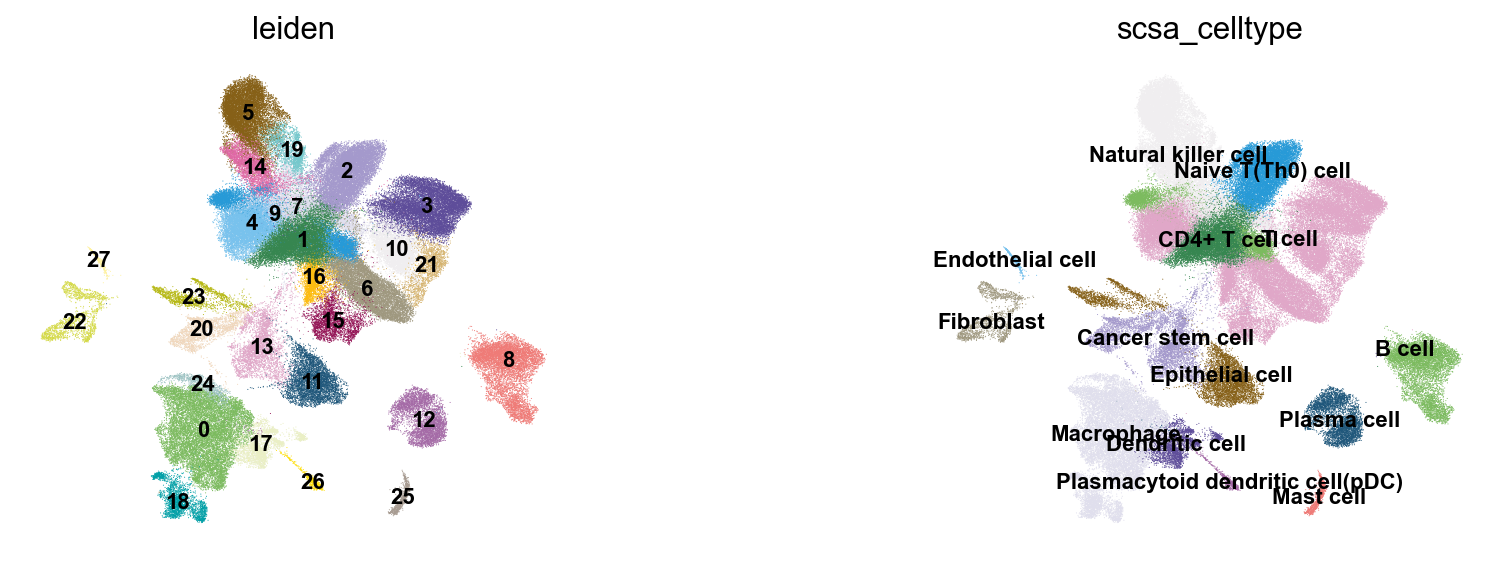

In [33]:
sc.pl.umap(adata, color=['leiden','scsa_celltype'], 
           wspace=0.5, 
           frameon=False, 
           palette=ov.utils.pyomic_palette(),
           legend_loc='on data',
           legend_fontsize=10,
          )

In [34]:
res_marker_dict={
'T cell': ['CD3D', 'CD3G', 'TRAC'],
'B cell': ['CD79A', 'CD19', 'MS4A1'],
'Plasma cell': ['IGHG1', 'IGHA1', 'MZB1', 'CD79A'],
'Myeloid cell': ['CD68', 'CD163', 'LYZ', 'CD14'],
'Natural killer cell': ['KLRF1', 'KLRD1', 'FGFBP2', 'PRF1'],
'Fibroblast': ['FAP', 'COL1A1', 'COL3A1', 'DCN', 'ACTA2'],
'Endothelial cell': ['CLDN5', 'CDH5'],
'Plasmacytoid dendritic cell(pDC)': ['LILRA4', 'IL3RA'],
'Epithelial cell': ['EPCAM'],
'Mast cell': ['TPSAB1', 'TPSB2', 'MS4A2'],
}

    using 'X_pca' with n_pcs = 100
Storing dendrogram info using `.uns['dendrogram_leiden']`
categories: 0, 1, 2, etc.
var_group_labels: T cell, B cell, Plasma cell, etc.


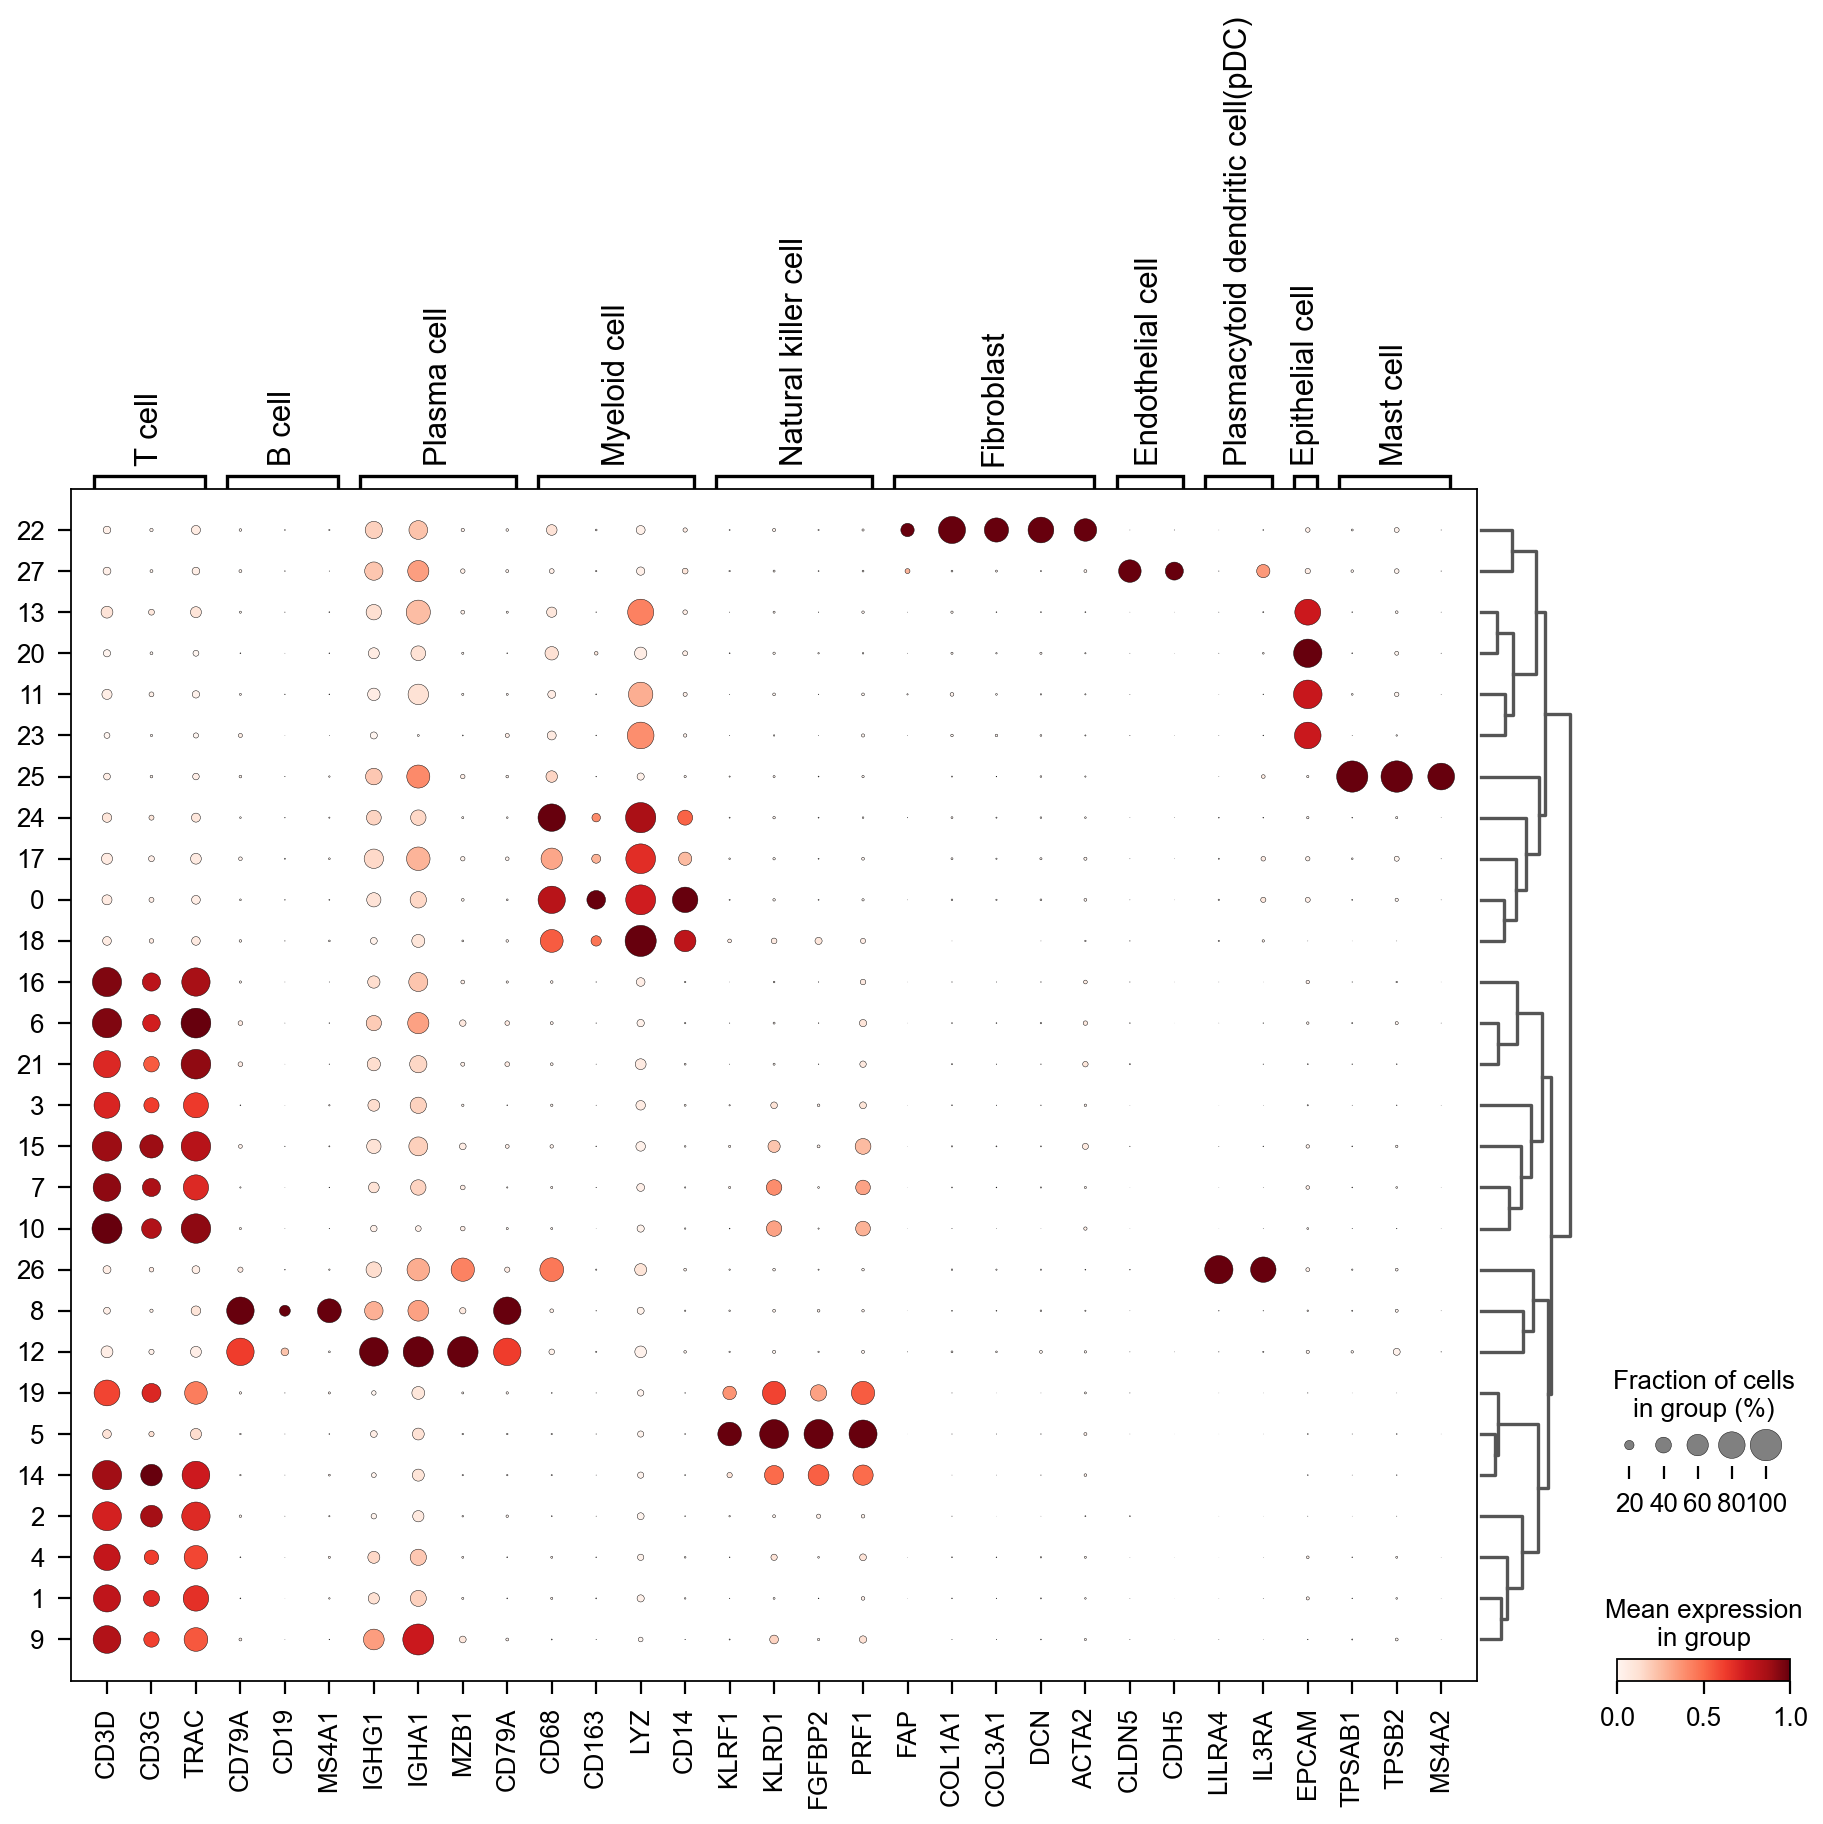

In [39]:
sc.tl.dendrogram(adata,'leiden')
sc.pl.dotplot(adata, res_marker_dict, 'leiden', dendrogram=True, standard_scale='var')


In [40]:
cluster2annotation = {
     '0': 'Myeloid cell',
     '1': 'T cell',
     '2': 'T cell',
     '3': 'T cell',
     '4': 'T cell',
     '5': 'Natural killer cell',
     '6': 'T cell',
     '7': 'T cell',
     '8': 'B cell',
     '9': 'T cell',
     '10': 'T cell',
     '11': 'Epithelial cell',
     '12': 'Plasma cell',
     '13': 'Epithelial cell',
     '14': 'T cell',
     '15': 'T cell',
     '16': 'T cell',
     '17': 'Myeloid cell',
     '18': 'Myeloid cell',
     '19': 'Natural killer cell',
     '20': 'Epithelial cell',
     '21': 'T cell',
     '22': 'Fibroblast',
     '23': 'Epithelial cell',
     '24': 'Myeloid cell',
     '25': 'Mast cell',
     '26': 'Plasmacytoid dendritic cell(pDC)',
     '27': 'Endothelial cell',
}

In [38]:
ov.single.scanpy_cellanno_from_dict(adata,anno_dict=cluster2annotation,
                                       clustertype='leiden')

...cell type added to major_celltype on obs of anndata


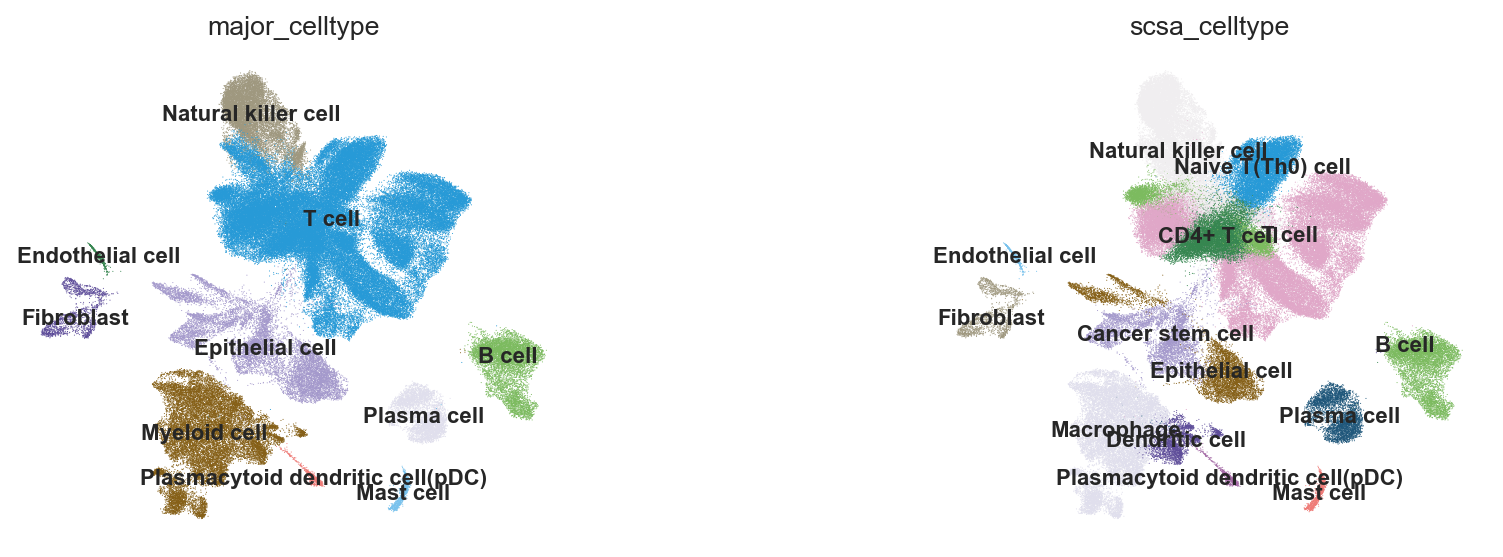

In [88]:
sc.pl.umap(adata, color=['major_celltype','scsa_celltype'], wspace=0.5, 
           frameon=False, 
           palette=ov.utils.pyomic_palette(),
           legend_loc='on data',
           legend_fontsize=10)

In [42]:
adata.write(results_file)

# Evaluation

In [5]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()

In [69]:
adata.obs.major_celltype.cat.categories

Index(['B cell', 'Endothelial cell', 'Epithelial cell', 'Fibroblast',
       'Mast cell', 'Myeloid cell', 'Natural killer cell', 'Plasma cell',
       'Plasmacytoid dendritic cell(pDC)', 'T cell'],
      dtype='object')

In [70]:
adata.obs.scsa_celltype.cat.categories

Index(['B cell', 'CD4+ T cell', 'Cancer stem cell', 'Dendritic cell',
       'Endothelial cell', 'Epithelial cell', 'Fibroblast', 'Macrophage',
       'Mast cell', 'Naive T(Th0) cell', 'Natural killer cell', 'Plasma cell',
       'Plasmacytoid dendritic cell(pDC)', 'T cell'],
      dtype='object')

In [42]:
mat=np.zeros((14,10))

In [43]:
mat

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [44]:
pd_mat=pd.DataFrame(mat, index=['B cell', 'Cancer stem cell', 'Dendritic cell','Endothelial cell', 'Epithelial cell', 'Fibroblast', 'Macrophage',
       'Mast cell', 'Naive T(Th0) cell', 'Natural killer cell', 'Plasma cell',
       'Plasmacytoid dendritic cell(pDC)', 'CD4+ T cell', 'T cell'], columns=['B cell', 'Endothelial cell', 'Epithelial cell', 'Fibroblast',
       'Mast cell', 'Myeloid cell', 'Natural killer cell', 'Plasma cell',
       'Plasmacytoid dendritic cell(pDC)', 'T cell'])

In [13]:
for i in range(len(adata.obs)):
    scsa_celltype = adata.obs.iloc[i]['scsa_celltype']
    major_celltype = adata.obs.iloc[i]['major_celltype']
    pd_mat.loc[scsa_celltype, major_celltype] += 1
    
pd_mat

,B cell,Endothelial cell,Epithelial cell,Fibroblast,Myeloid cell,Mast cell,Natural killer cell,Plasma cell,Plasmacytoid dendritic cell(pDC),T cell
B cell,7006.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4769.0
Cancer stem cell,0.0,0.0,5563.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dendritic cell,0.0,0.0,0.0,0.0,2512.0,0.0,0.0,0.0,0.0,0.0
Endothelial cell,0.0,307.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Epithelial cell,0.0,0.0,5847.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fibroblast,0.0,0.0,0.0,1600.0,0.0,0.0,0.0,0.0,0.0,0.0
Myeloid cell,0.0,0.0,0.0,0.0,15355.0,0.0,0.0,0.0,0.0,0.0
Mast cell,0.0,0.0,0.0,0.0,0.0,771.0,0.0,0.0,0.0,0.0
Natural killer cell,0.0,0.0,0.0,0.0,0.0,0.0,11410.0,0.0,0.0,10790.0
Plasma cell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4090.0,0.0,0.0


In [14]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()

In [15]:
normalized_mat = scaler.fit_transform(mat)

In [16]:
normalized_mat

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.07673494],
       [0.        , 0.        , 0.95142808, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.16359492,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [17]:
pd_nor_mat=pd.DataFrame(normalized_mat, index=['B cell', 'Cancer stem cell', 'Dendritic cell','Endothelial cell', 'Epithelial cell', 'Fibroblast', 'Macrophage',
       'Mast cell', 'Naive T(Th0) cell', 'Natural killer cell', 'Plasma cell',
       'Plasmacytoid dendritic cell(pDC)', 'CD4+ T cell', 'T cell'], columns=['B cell', 'Endothelial cell', 'Epithelial cell', 'Fibroblast',
       'Mast cell', 'Myeloid cell', 'Natural killer cell', 'Plasma cell',
       'Plasmacytoid dendritic cell(pDC)', 'T cell'])

In [18]:
pd_nor_mat

,B cell,Endothelial cell,Epithelial cell,Fibroblast,Myeloid cell,Mast cell,Natural killer cell,Plasma cell,Plasmacytoid dendritic cell(pDC),T cell
B cell,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.076735
Cancer stem cell,0.0,0.0,0.951428,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
Dendritic cell,0.0,0.0,0.000000,0.0,0.163595,0.0,0.0,0.0,0.0,0.000000
Endothelial cell,0.0,1.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
Epithelial cell,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
Fibroblast,0.0,0.0,0.000000,1.0,0.000000,0.0,0.0,0.0,0.0,0.000000
Myeloid cell,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000
Mast cell,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.000000
Natural killer cell,0.0,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.173615
Plasma cell,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.000000


In [103]:
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import f1_score
f1 = f1_score(adata.obs['major_celltype'],adata.obs['scsa_true_celltype'], average='weighted')
ami_score = adjusted_mutual_info_score(adata.obs['major_celltype'],adata.obs['scsa_true_celltype'])

print("F1 score with average='weighted':", f1)
print("AMI score':", ami_score)

F1 score with average='weighted': 0.8559731414725444
AMI score': 0.7871453798045023


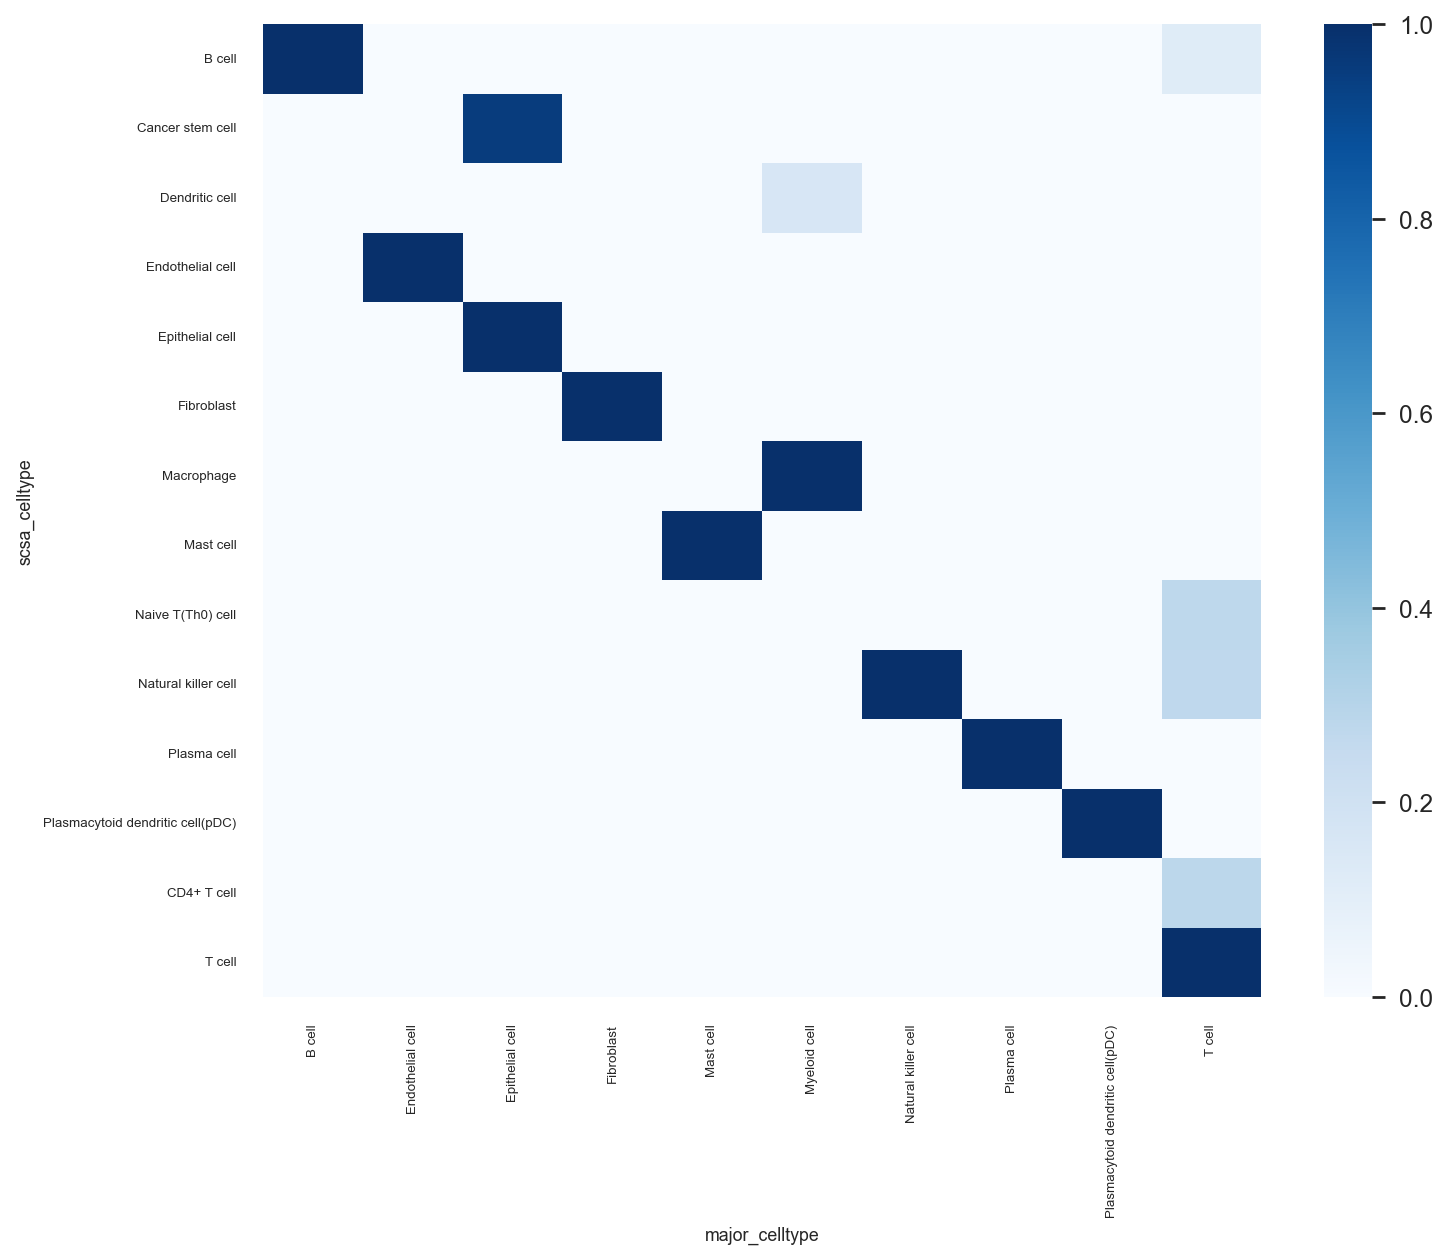

In [109]:
fig,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(pd_nor_mat, cmap="Blues")
plt.ylabel('scsa_celltype', fontsize=8)
plt.xlabel('major_celltype', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.savefig('confusion.pdf', bbox_inches='tight')

## Merging cells of the same type 

In [56]:
cluster_scsa = {
    'B cell':'B cell', 
    'Cancer stem cell':'Cancer stem cell', 
    'Dendritic cell':'Dendritic cell',
    'Endothelial cell':'Endothelial cell', 
    'Epithelial cell':'Epithelial cell', 
    'Fibroblast':'Fibroblast', 
    'Macrophage':'Myeloid cell',
    'Mast cell': 'Mast cell', 
    'Naive T(Th0) cell': 'T cell', 
    'Natural killer cell':'Natural killer cell', 
    'Plasma cell':'Plasma cell',
    'Plasmacytoid dendritic cell(pDC)':'Plasmacytoid dendritic cell(pDC)', 
    'CD4+ T cell':'T cell', 
    'T cell':'T cell',
}

In [57]:
adata.obs['scsa_true_celltype'] = adata.obs['scsa_celltype'].map(cluster_scsa).astype('category')

In [6]:
mat=np.zeros((12,10))
mat

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [7]:
pd_mat=pd.DataFrame(mat, index=['B cell', 'Cancer stem cell', 'Dendritic cell','Endothelial cell', 'Epithelial cell', 'Fibroblast', 'Myeloid cell',
       'Mast cell',  'Natural killer cell', 'Plasma cell',
       'Plasmacytoid dendritic cell(pDC)',  'T cell'], columns=['B cell', 'Endothelial cell', 'Epithelial cell', 'Fibroblast',
      'Myeloid cell',  'Mast cell', 'Natural killer cell', 'Plasma cell',
       'Plasmacytoid dendritic cell(pDC)', 'T cell'])

In [8]:
for i in range(len(adata.obs)):
    scsa_celltype = adata.obs.iloc[i]['scsa_true_celltype']
    major_celltype = adata.obs.iloc[i]['major_celltype']
    pd_mat.loc[scsa_celltype, major_celltype] += 1
    
pd_mat

,B cell,Endothelial cell,Epithelial cell,Fibroblast,Myeloid cell,Mast cell,Natural killer cell,Plasma cell,Plasmacytoid dendritic cell(pDC),T cell
B cell,7006.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4769.0
Cancer stem cell,0.0,0.0,5563.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dendritic cell,0.0,0.0,0.0,0.0,2512.0,0.0,0.0,0.0,0.0,0.0
Endothelial cell,0.0,307.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Epithelial cell,0.0,0.0,5847.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fibroblast,0.0,0.0,0.0,1600.0,0.0,0.0,0.0,0.0,0.0,0.0
Myeloid cell,0.0,0.0,0.0,0.0,15355.0,0.0,0.0,0.0,0.0,0.0
Mast cell,0.0,0.0,0.0,0.0,0.0,771.0,0.0,0.0,0.0,0.0
Natural killer cell,0.0,0.0,0.0,0.0,0.0,0.0,11410.0,0.0,0.0,10790.0
Plasma cell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4090.0,0.0,0.0


In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()

In [10]:
normalized_mat = scaler.fit_transform(mat)
normalized_mat

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.07673494],
       [0.        , 0.        , 0.95142808, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.16359492,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [16]:
pd_nor_mat=pd.DataFrame(normalized_mat, index=['B cell', 'Cancer stem cell', 'Dendritic cell','Endothelial cell', 'Epithelial cell', 'Fibroblast', 'Myeloid cell',
       'Mast cell',  'Natural killer cell', 'Plasma cell',
       'pDC',  'T cell'], columns=['B cell', 'Endothelial cell', 'Epithelial cell', 'Fibroblast',
      'Myeloid cell',  'Mast cell', 'Natural killer cell', 'Plasma cell',
       'pDC', 'T cell'])

In [17]:
pd_nor_mat

,B cell,Endothelial cell,Epithelial cell,Fibroblast,Myeloid cell,Mast cell,Natural killer cell,Plasma cell,pDC,T cell
B cell,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.076735
Cancer stem cell,0.0,0.0,0.951428,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
Dendritic cell,0.0,0.0,0.000000,0.0,0.163595,0.0,0.0,0.0,0.0,0.000000
Endothelial cell,0.0,1.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
Epithelial cell,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
Fibroblast,0.0,0.0,0.000000,1.0,0.000000,0.0,0.0,0.0,0.0,0.000000
Myeloid cell,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000
Mast cell,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.000000
Natural killer cell,0.0,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.173615
Plasma cell,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.000000


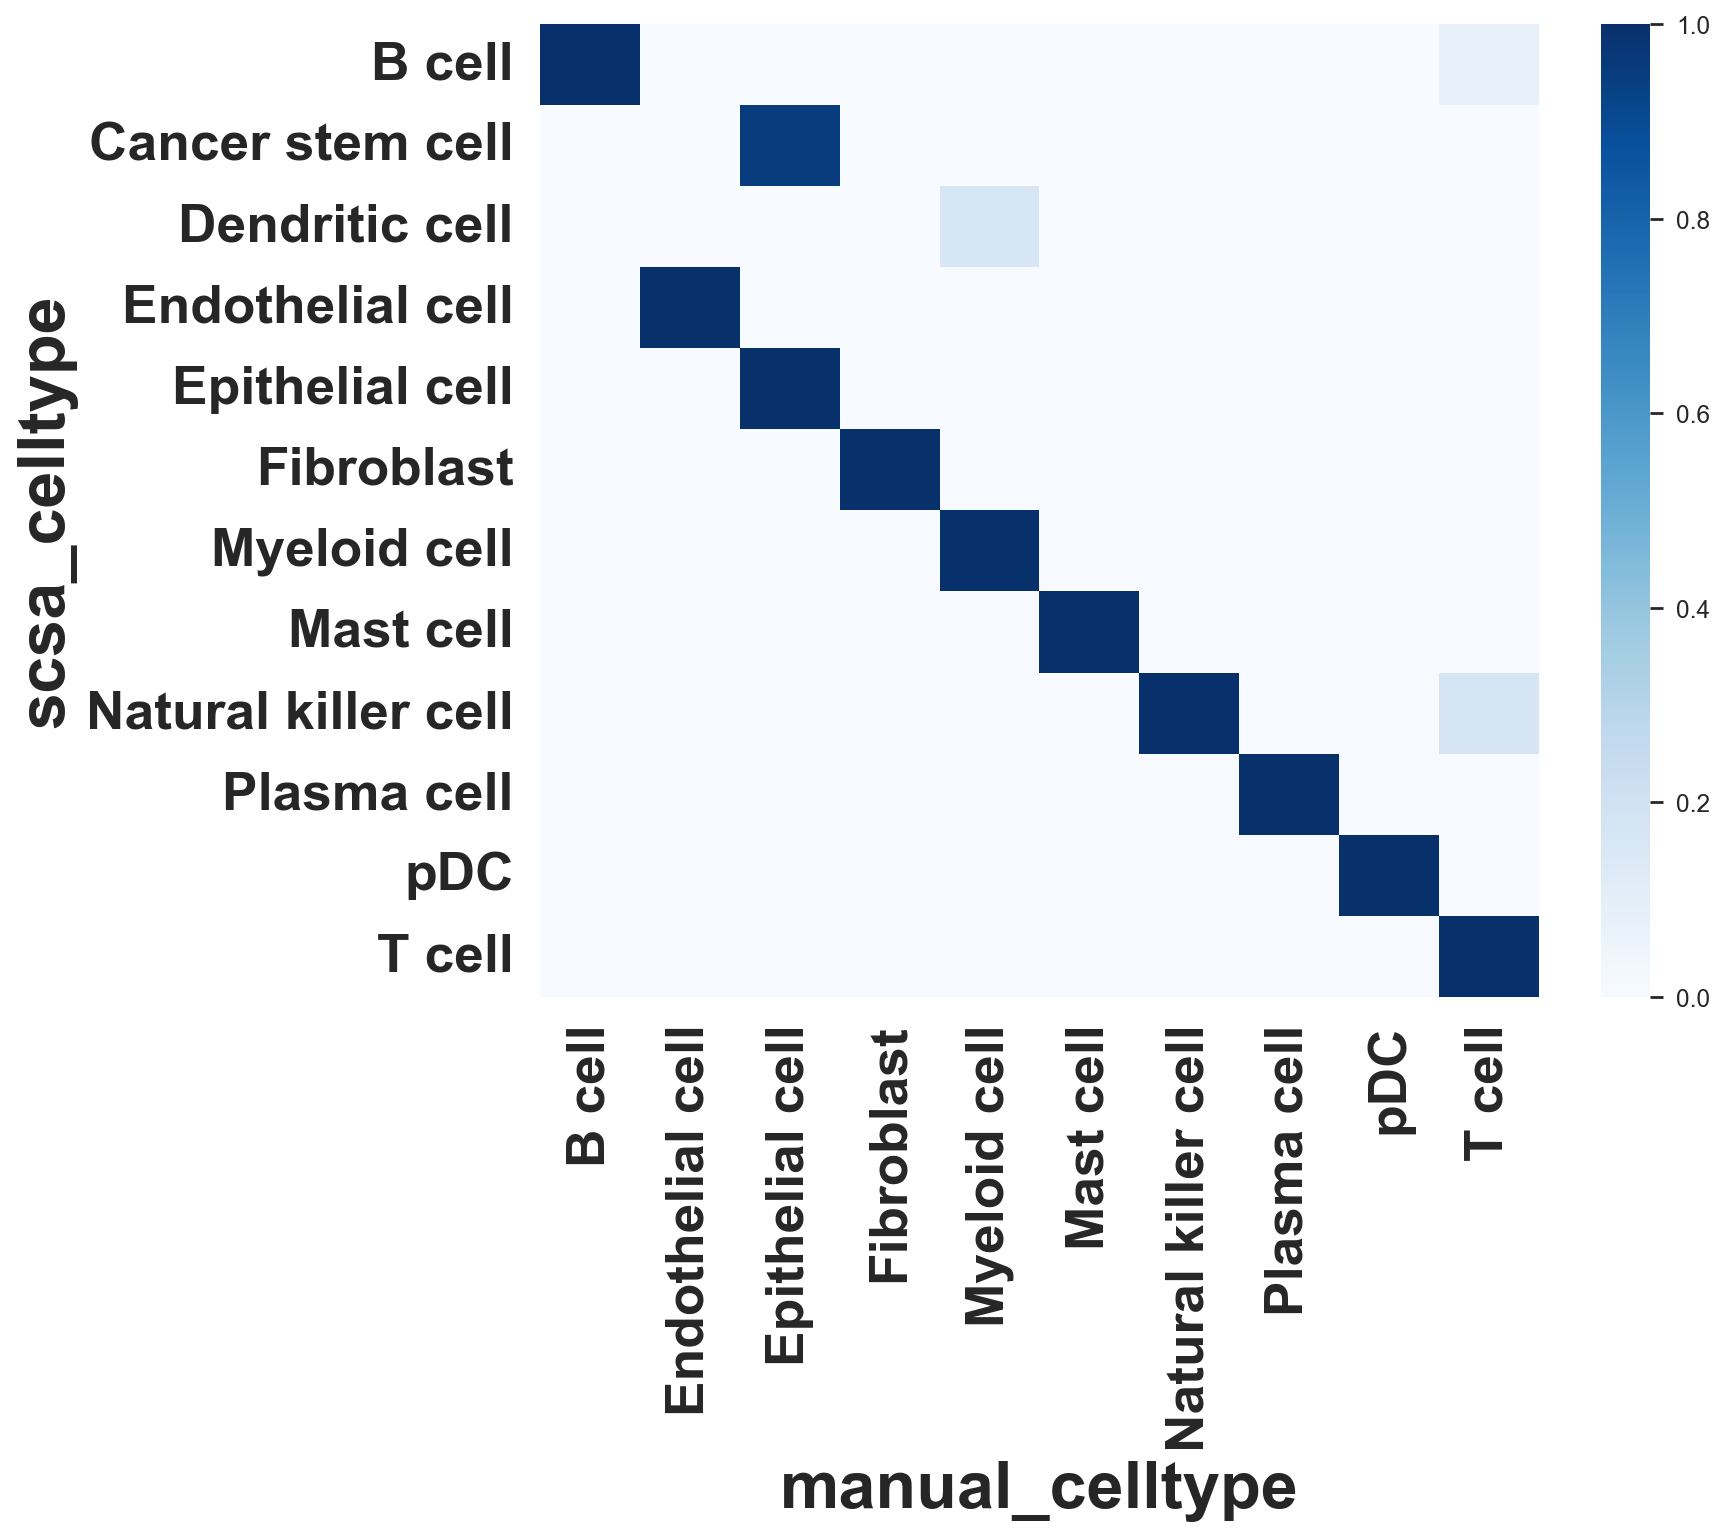

In [23]:
fig,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(pd_nor_mat, cmap="Blues")
plt.ylabel('scsa_celltype', fontsize=30,fontweight='bold')
plt.xlabel('manual_celltype', fontsize=30,fontweight='bold')
plt.xticks(fontsize=24,fontweight='bold')
plt.yticks(fontsize=24,fontweight='bold')
plt.savefig('confusion.png', dpi=300,bbox_inches = 'tight',transparent=True)

In [ ]:
results_file = 'crc2.h5ad' 
adata.write(results_file)